In [1]:
import pandas as pd
import inventorize3 as inv

In [2]:
retail = pd.read_csv("online_retail2.csv")
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
retail = retail.drop_duplicates().dropna(axis = 0)

In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797885 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      797885 non-null  object 
 1   StockCode    797885 non-null  object 
 2   Description  797885 non-null  object 
 3   Quantity     797885 non-null  int64  
 4   InvoiceDate  797885 non-null  object 
 5   Price        797885 non-null  float64
 6   Customer ID  797885 non-null  float64
 7   Country      797885 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 54.8+ MB


In [5]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
retail['date'] = retail['InvoiceDate'].dt.strftime('%Y-%m-%d')
retail['date'] = pd.to_datetime(retail['date'])

In [6]:
retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-12-01


In [7]:
max_date = max(retail['date'])
max_date

Timestamp('2011-12-09 00:00:00')

In [8]:
last_four_month = retail[retail['date'] > '2011-08-01']
last_four_month

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date
812082,562032,23308,SET OF 60 VINTAGE LEAF CAKE CASES,24,2011-08-02 08:48:00,0.55,12347.0,Iceland,2011-08-02
812083,562032,23297,SET 40 HEART SHAPE PETIT FOUR CASES,16,2011-08-02 08:48:00,1.65,12347.0,Iceland,2011-08-02
812084,562032,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-08-02 08:48:00,4.25,12347.0,Iceland,2011-08-02
812085,562032,22374,AIRLINE BAG VINTAGE JET SET RED,4,2011-08-02 08:48:00,4.25,12347.0,Iceland,2011-08-02
812086,562032,22376,AIRLINE BAG VINTAGE JET SET WHITE,4,2011-08-02 08:48:00,4.25,12347.0,Iceland,2011-08-02
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-09


In [9]:
last_four_month['revenue'] = last_four_month['Quantity'] * last_four_month['Price']

C:\Users\thanh\AppData\Local\Temp\ipykernel_888\2225777786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_four_month['revenue'] = last_four_month['Quantity'] * last_four_month['Price']


In [10]:
a = last_four_month.groupby(by = ['date', 'Description']).agg(total_daily = ('Quantity', 'sum'), total_revenue = ('revenue', 'sum')).reset_index()

In [11]:
grouped = a.groupby('Description').agg(average_sales = ('total_daily', 'mean'), 
                                       sd = ('total_daily', 'std'),
                                       total_sales = ('total_daily', 'sum'), 
                                       total_revenue = ('total_revenue', 'sum')).reset_index()

In [12]:
grouped

,Description,average_sales,sd,total_sales,total_revenue
0,4 PURPLE FLOCK DINNER CANDLES,5.300000,6.105218,106,184.06
1,50'S CHRISTMAS GIFT BAG LARGE,31.383333,55.507242,1883,2269.75
2,DOLLY GIRL BEAKER,29.743590,73.454012,2320,2662.00
3,I LOVE LONDON MINI BACKPACK,8.159091,11.966898,359,1449.85
4,I LOVE LONDON MINI RUCKSACK,1.000000,NaN,1,4.15
...,...,...,...,...,...
3216,ZINC T-LIGHT HOLDER STARS SMALL,30.487500,37.806635,2439,1967.73
3217,ZINC TOP 2 DOOR WOODEN SHELF,1.000000,NaN,1,16.95
3218,ZINC WILLIE WINKIE CANDLE STICK,24.594203,30.790716,1697,1403.45
3219,ZINC WIRE KITCHEN ORGANISER,2.714286,2.984085,19,94.40


In [13]:
abc_analysis = inv.productmix(skus = grouped['Description'],
                              sales = grouped['total_sales'],
                              revenue = grouped['total_revenue'])
abc_analysis['product_mix'].value_counts()

product_mix
C_C    1456
A_A     501
B_B     314
B_C     238
C_B     235
A_B     226
B_A     174
A_C      42
C_A      35
Name: count, dtype: int64

In [14]:
lead_time = 12
sd_lead_time = 2

In [15]:
service_level_mapping = {'A_A':0.95, 'A_B':0.95, 'A_C':0.95,
           'B_A':0.7, 'B_B':0.7, 'B_C':0.75,
          'C_A':0.8, 'C_B':0.8, 'C_C':0.7}

In [16]:
abc_analysis['service_level'] = abc_analysis['product_mix'].map(service_level_mapping)
abc_analysis.head()

,skus,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix,service_level
2162,RABBIT NIGHT LIGHT,24112,45484.50,0.010261,0.022104,0.011468,0.011468,A,A,A_A,0.95
2263,REGENCY CAKESTAND 3 TIER,3482,40660.05,0.001482,0.330049,0.010251,0.021719,A,A,A_A,0.95
1432,JUMBO BAG RED RETROSPOT,20013,37823.09,0.008516,0.030621,0.009536,0.031255,A,A,A_A,0.95
1902,PAPER CHAIN KIT 50'S CHRISTMAS,12680,34788.68,0.005396,0.057622,0.008771,0.040026,A,A,A_A,0.95
3074,WHITE HANGING HEART T-LIGHT HOLDER,11634,32375.26,0.004951,0.072910,0.008162,0.048188,A,A,A_A,0.95


In [17]:
inv.reorderpoint(dailydemand = 80, dailystandarddeviation = 10, csl = 0.75, leadtimein_days = 12)

{'demandleadtime': 960,
 'sigmadl': 34.64101615137754,
 'safteyfactor': 0.6744897501960817,
 'reorder_point': 983.365010330481}

In [18]:
abcd = abc_analysis[['skus', 'service_level']]

In [19]:
rop_calculation = pd.merge(left = grouped, right = abcd, how = 'inner', left_on = 'Description', right_on = 'skus')

In [20]:
rop_calculation.head()

,Description,average_sales,sd,total_sales,total_revenue,skus,service_level
0,4 PURPLE FLOCK DINNER CANDLES,5.300000,6.105218,106,184.06,4 PURPLE FLOCK DINNER CANDLES,0.70
1,50'S CHRISTMAS GIFT BAG LARGE,31.383333,55.507242,1883,2269.75,50'S CHRISTMAS GIFT BAG LARGE,0.95
2,DOLLY GIRL BEAKER,29.743590,73.454012,2320,2662.00,DOLLY GIRL BEAKER,0.95
3,I LOVE LONDON MINI BACKPACK,8.159091,11.966898,359,1449.85,I LOVE LONDON MINI BACKPACK,0.70
4,I LOVE LONDON MINI RUCKSACK,1.000000,NaN,1,4.15,I LOVE LONDON MINI RUCKSACK,0.70


In [21]:
empty_df = pd.DataFrame()
for i in range(rop_calculation.shape[0]):
    reorder_point = inv.reorderpoint(dailydemand = rop_calculation.loc[i, 'average_sales'], 
                                     dailystandarddeviation = rop_calculation.loc[i, 'sd'], 
                                     csl = rop_calculation.loc[i, 'service_level'], 
                                     leadtimein_days = 12)
    as_data = pd.DataFrame(reorder_point, index = [0]) 
    as_data['Description'] = rop_calculation['Description'][i]
    empty_df = pd.concat([empty_df, as_data], axis = 0)

In [22]:
empty_df

,demandleadtime,sigmadl,safteyfactor,reorder_point,Description
0,63.600000,21.149095,0.524401,74.690596,4 PURPLE FLOCK DINNER CANDLES
0,376.600000,192.282728,1.644854,692.876942,50'S CHRISTMAS GIFT BAG LARGE
0,356.923077,254.452161,1.644854,775.459636,DOLLY GIRL BEAKER
0,97.909091,41.454552,0.524401,119.647879,I LOVE LONDON MINI BACKPACK
0,12.000000,NaN,0.524401,NaN,I LOVE LONDON MINI RUCKSACK
...,...,...,...,...,...
0,365.850000,130.966024,1.644854,581.269939,ZINC T-LIGHT HOLDER STARS SMALL
0,12.000000,NaN,0.524401,NaN,ZINC TOP 2 DOOR WOODEN SHELF
0,295.130435,106.662170,1.644854,470.574091,ZINC WILLIE WINKIE CANDLE STICK
0,32.571429,10.337173,0.524401,37.992247,ZINC WIRE KITCHEN ORGANISER


In [23]:
merged = pd.merge(left = rop_calculation, right = empty_df, how = 'inner', on = 'Description')
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Description     3221 non-null   object 
 1   average_sales   3221 non-null   float64
 2   sd              3019 non-null   float64
 3   total_sales     3221 non-null   int64  
 4   total_revenue   3221 non-null   float64
 5   skus            3221 non-null   object 
 6   service_level   3221 non-null   float64
 7   demandleadtime  3221 non-null   float64
 8   sigmadl         3019 non-null   float64
 9   safteyfactor    3221 non-null   float64
 10  reorder_point   3019 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 276.9+ KB


In [24]:
merged['safety_stock'] = merged['reorder_point'] - merged['demandleadtime']
merged.head()

,Description,average_sales,sd,total_sales,total_revenue,skus,service_level,demandleadtime,sigmadl,safteyfactor,reorder_point,safety_stock
0,4 PURPLE FLOCK DINNER CANDLES,5.300000,6.105218,106,184.06,4 PURPLE FLOCK DINNER CANDLES,0.70,63.600000,21.149095,0.524401,74.690596,11.090596
1,50'S CHRISTMAS GIFT BAG LARGE,31.383333,55.507242,1883,2269.75,50'S CHRISTMAS GIFT BAG LARGE,0.95,376.600000,192.282728,1.644854,692.876942,316.276942
2,DOLLY GIRL BEAKER,29.743590,73.454012,2320,2662.00,DOLLY GIRL BEAKER,0.95,356.923077,254.452161,1.644854,775.459636,418.536559
3,I LOVE LONDON MINI BACKPACK,8.159091,11.966898,359,1449.85,I LOVE LONDON MINI BACKPACK,0.70,97.909091,41.454552,0.524401,119.647879,21.738789
4,I LOVE LONDON MINI RUCKSACK,1.000000,NaN,1,4.15,I LOVE LONDON MINI RUCKSACK,0.70,12.000000,NaN,0.524401,NaN,NaN


In [25]:
import seaborn as sns

<Axes: xlabel='sd', ylabel='safety_stock'>

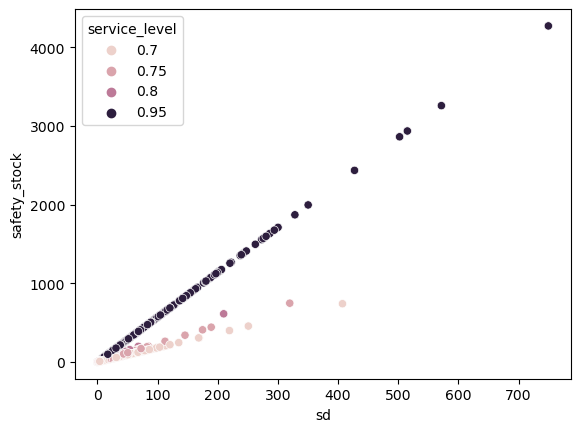

In [26]:
merged = merged[merged['safety_stock'] != max(merged['safety_stock'])]
sns.scatterplot(data = merged, x = 'sd', y = 'safety_stock', hue = 'service_level')

In [27]:
empty_df_leadtime = pd.DataFrame()
for i in range(rop_calculation.shape[0]):
    reorder_point_lt = inv.reorderpoint_leadtime_variability(dailydemand=rop_calculation['average_sales'][i], 
                                                          dailystandarddeviation=rop_calculation['sd'][i], 
                                                          leadtimein_days=12, 
                                                          sd_leadtime_days=2, 
                                                          csl = rop_calculation['service_level'][i])
    as_data_lt = pd.DataFrame(reorder_point, index = [0]) 
    as_data_lt['Description'] = rop_calculation['Description'][i]
    empty_df_leadtime = pd.concat([empty_df_leadtime, as_data_lt], axis = 0)

TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''